In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
Baird_ELA = pd.ExcelFile('data/Galileo Baird Data CST (Updated).xlsx')
Baird_Math = pd.ExcelFile('data/Galileo Data Baird Math.xlsx')

Madrigal_ELA = pd.ExcelFile('data/Galileo Madrigal ELA Data CST.xlsx')
Madrigal_Math = pd.ExcelFile('data/Galileo Madrigal ELA Data CST.xlsx')

In [5]:
Madrigal_Math.sheet_names

[u'2017-18',
 u'2016-17',
 u'2015-16',
 u'2014-15',
 u'2013-14',
 u'2012-13',
 u'2011-12']

In [6]:
#Scores for Ms. Baird Special Education (ELA):
Baird_ELA_17_18 = Baird_ELA.parse('2017-18')
Baird_ELA_16_17 = Baird_ELA.parse('2016-17')
Baird_ELA_15_16 = Baird_ELA.parse('2015-16')
Baird_ELA_14_15 = Baird_ELA.parse('2014-15')
Baird_ELA_13_14 = Baird_ELA.parse('2013-14')

#Scores for Ms. Baird Special Education (Math):
Baird_Math_17_18 = Baird_Math.parse('2017-18')
Baird_Math_16_17 = Baird_Math.parse('2016-17')
Baird_Math_15_16 = Baird_Math.parse('2015-16')
Baird_Math_14_15 = Baird_Math.parse('2014-15')
Baird_Math_13_14 = Baird_Math.parse('2013-14')

# #Scores for Ms. Madrigal 3rd Grade (ELA):
Madrigal_Math_17_18 = Madrigal_Math.parse('2017-18')
Madrigal_Math_16_17 = Madrigal_Math.parse('2016-17')
Madrigal_Math_15_16 = Madrigal_Math.parse('2015-16')
Madrigal_Math_14_15 = Madrigal_Math.parse('2014-15')
Madrigal_Math_13_14 = Madrigal_Math.parse('2013-14')
Madrigal_Math_12_13 = Madrigal_Math.parse('2012-13')
Madrigal_Math_11_12 = Madrigal_Math.parse('2011-12')

# #Scores for Ms. Madrigal 3rd Grade (Math):
Madrigal_ELA_17_18 = Madrigal_ELA.parse('2017-18')
Madrigal_ELA_16_17 = Madrigal_ELA.parse('2016-17')
Madrigal_ELA_15_16 = Madrigal_ELA.parse('2015-16')
Madrigal_ELA_14_15 = Madrigal_ELA.parse('2014-15')
Madrigal_ELA_13_14 = Madrigal_ELA.parse('2013-14')
Madrigal_ELA_12_13 = Madrigal_ELA.parse('2012-13')
Madrigal_ELA_11_12 = Madrigal_ELA.parse('2011-12')

In [7]:
#Baird Math, dropped columns that did not have test scores
Baird_Math_17_18.drop(Baird_Math_17_18.columns[[6,7,8,9,10,11,12]], axis=1, inplace=True)
Baird_Math_16_17.drop(Baird_Math_16_17.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_15_16.drop(Baird_Math_15_16.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_14_15.drop(Baird_Math_14_15.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_Math_13_14.drop(Baird_Math_13_14.columns[[6,7,8,9,10,11,12,13]], axis=1, inplace=True)

#Baird ELA, dropped columns that did not have test scores
Baird_ELA_17_18.drop(Baird_ELA_17_18.columns[[4,5,6,7,8,9,10]], axis=1, inplace=True)
Baird_ELA_16_17.drop(Baird_ELA_16_17.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_15_16.drop(Baird_ELA_15_16.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_14_15.drop(Baird_ELA_14_15.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
Baird_ELA_13_14.drop(Baird_ELA_13_14.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)

In [8]:
#Removed NaN values from Baird class
Baird_ELA_13_14.dropna(inplace=True)
Baird_ELA_13_14.drop(Baird_ELA_13_14.tail(3).index,inplace=True)
Baird_ELA_14_15.dropna(inplace=True)
Baird_ELA_14_15.drop(Baird_ELA_14_15.tail(3).index,inplace=True)
Baird_ELA_15_16.dropna(inplace=True)
Baird_ELA_15_16.drop(Baird_ELA_15_16.tail(3).index,inplace=True)
Baird_ELA_16_17.dropna(inplace=True)
Baird_ELA_16_17.drop(Baird_ELA_16_17.tail(3).index,inplace=True)
Baird_ELA_17_18.dropna(inplace=True)
Baird_ELA_17_18.drop(Baird_ELA_17_18.tail(3).index,inplace=True)

Baird_Math_13_14.dropna(inplace=True)
Baird_Math_13_14.drop(Baird_Math_13_14.tail(3).index,inplace=True)
Baird_Math_14_15.dropna(inplace=True)
Baird_Math_14_15.drop(Baird_Math_14_15.tail(3).index,inplace=True)
Baird_Math_15_16.dropna(inplace=True)
Baird_Math_15_16.drop(Baird_Math_15_16.tail(3).index,inplace=True)
Baird_Math_16_17.dropna(inplace=True)
Baird_Math_16_17.drop(Baird_Math_16_17.tail(3).index,inplace=True)
Baird_Math_17_18.dropna(inplace=True)
Baird_Math_17_18.drop(Baird_Math_17_18.tail(3).index,inplace=True)

Madrigal_ELA_11_12.dropna(inplace=True)
Madrigal_ELA_12_13.dropna(inplace=True)
Madrigal_ELA_13_14.dropna(inplace=True)
Madrigal_ELA_14_15.dropna(inplace=True)
Madrigal_ELA_15_16.dropna(inplace=True)
Madrigal_ELA_16_17.dropna(inplace=True)
Madrigal_ELA_17_18.dropna(inplace=True)

In [9]:
#Adding year column:
Baird_ELA_13_14['Year'] = '2013-2014'
Baird_ELA_14_15['Year'] = '2014-2015'
Baird_ELA_15_16['Year'] = '2015-2016'
Baird_ELA_16_17['Year'] = '2016-2017'
Baird_ELA_17_18['Year'] = '2017-2018'

Baird_Math_13_14['Year'] = '2013-2014'
Baird_Math_14_15['Year'] = '2014-2015'
Baird_Math_15_16['Year'] = '2015-2016'
Baird_Math_16_17['Year'] = '2016-2017'
Baird_Math_17_18['Year'] = '2017-2018'

Madrigal_ELA_11_12['Year'] = '2011-2012'
Madrigal_ELA_12_13['Year'] = '2012-2013'
Madrigal_ELA_13_14['Year'] = '2013-2014'
Madrigal_ELA_14_15['Year'] = '2014-2015'
Madrigal_ELA_15_16['Year'] = '2015-2016'
Madrigal_ELA_16_17['Year'] = '2016-2017'
Madrigal_ELA_17_18['Year'] = '2017-2018'

Madrigal_Math_11_12['Year'] = '2011-2012'
Madrigal_Math_12_13['Year'] = '2012-2013'
Madrigal_Math_13_14['Year'] = '2013-2014'
Madrigal_Math_14_15['Year'] = '2014-2015'
Madrigal_Math_15_16['Year'] = '2015-2016'
Madrigal_Math_16_17['Year'] = '2016-2017'
Madrigal_Math_17_18['Year'] = '2017-2018'

In [10]:
#Combining classroom years:
Baird_ELA_list = [Baird_ELA_13_14, Baird_ELA_14_15, Baird_ELA_15_16, Baird_ELA_16_17, Baird_ELA_16_17, Baird_ELA_17_18]
Baird_Math_list = [Baird_Math_13_14, Baird_Math_14_15, Baird_Math_15_16, Baird_Math_16_17, Baird_Math_16_17, Baird_Math_17_18]
Madrigal_ELA_list = [Madrigal_ELA_11_12, Madrigal_ELA_12_13, Madrigal_ELA_13_14, Madrigal_ELA_14_15, Madrigal_ELA_15_16, Madrigal_ELA_16_17, Madrigal_ELA_17_18]
Madrigal_Math_list = [Madrigal_Math_11_12, Madrigal_Math_12_13, Madrigal_Math_13_14, Madrigal_Math_14_15, Madrigal_Math_15_16, Madrigal_Math_16_17, Madrigal_Math_17_18]

Baird_ELA_Master = pd.concat(Baird_ELA_list)
Baird_Math_Master = pd.concat(Baird_Math_list)
Madrigal_ELA_Master = pd.concat(Madrigal_ELA_list)
Madrigal_Math_Master = pd.concat(Madrigal_Math_list)

In [11]:
# Madrigal_ELA_Master['Post Score'].astype(str).astype(float)

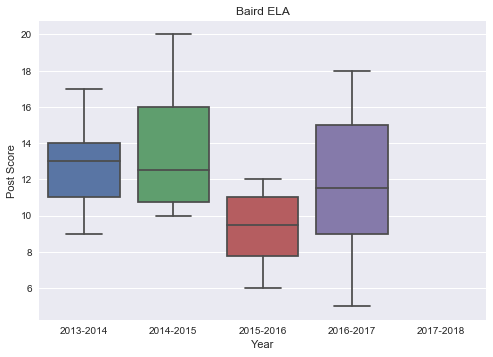

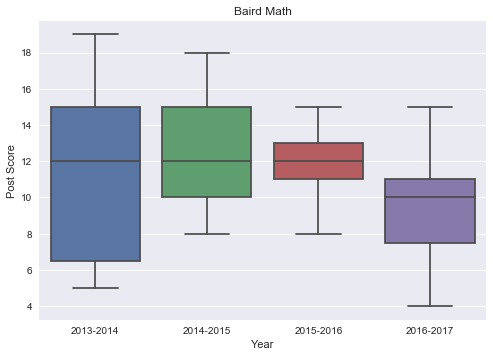

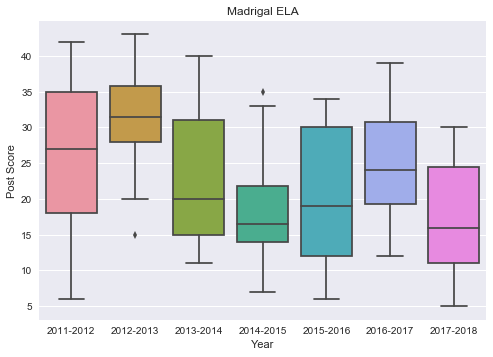

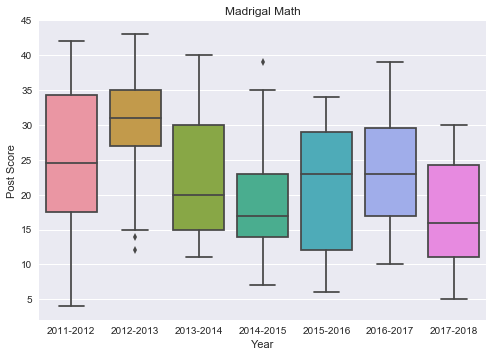

In [12]:
#Box Plots

#Baird:
sns.boxplot(x='Year' ,y='Post Score', data=Baird_ELA_Master).set_title('Baird ELA')
plt.show()
sns.boxplot(x='Year' ,y='Post Score', data=Baird_Math_Master).set_title('Baird Math')
plt.show()

#Madrigal:
sns.boxplot(x='Year' ,y='Post Score', data=Madrigal_ELA_Master).set_title('Madrigal ELA')
plt.show()
sns.boxplot(x='Year' ,y='Post Score', data=Madrigal_Math_Master).set_title('Madrigal Math')
plt.show()

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Post Score ~ Year',
                data=Baird_ELA_Master).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

SyntaxError: invalid syntax (<unknown>, line 1)